<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.959 · Visualització de dades · PAC3
</p>
<p style="margin: 0; text-align:right;">2022-2 · Máster universitari en Ciencia de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

**Nom: Víctor Iruela Garrido**

# PAC 3: Creació d'una visualitació interactiva
El següent codi ha estat creat i utilitzat per a processar i emmagatzemar diferents sets de dades per a poder fer les respectives representacions.

# 1. Processament de dades

**Font de les dades**
- https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption

In [1]:
from google.colab import drive
drive.mount('/content/drive')
#MODIFICAR D'ACORD A LA RUTA DE LES TEVES CARPETES
%cd /content/drive/MyDrive/Colab Notebooks/VISUALITZACIO

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/VISUALITZACIO


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('World Energy Consumption.csv').fillna(0)
df = df.loc[(df['year'] > 1965) & (df['year'] != 2020)]
reference_var = ['iso_code', 'country', 'year', 'population']
list_consumption_countries = [item for item in list(df) if 'consumption' in str(item) or item in reference_var]
df = df.loc[:, df.columns.isin(list_consumption_countries)]
df.to_csv('World Energy Consumption (clean).csv')

In [4]:
def divide_cols_by_one(df, col_name, factor, cols=None, cols2=None):
    df2 = df.copy(deep=True)
    if cols is None:
        cols = list(df2)
    if cols2 is not None:
        cols = [col for col in cols if col not in cols2]
    for col in cols:
        df2[col] = (df2[col] / df2[col_name]) * factor
    return df2

In [5]:
df_standard = divide_cols_by_one(
    df, 'population', 100000, cols=None, cols2=reference_var
)
df_standard.to_csv('World Energy Consumption per 100000 (clean).csv')
df_standard.head()

,iso_code,country,year,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,population,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
66,AFG,Afghanistan,1966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10175000.0,0.0,0.0,0.0,0.0
67,AFG,Afghanistan,1967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10400000.0,0.0,0.0,0.0,0.0
68,AFG,Afghanistan,1968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10637000.0,0.0,0.0,0.0,0.0
69,AFG,Afghanistan,1969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10894000.0,0.0,0.0,0.0,0.0
70,AFG,Afghanistan,1970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11174000.0,0.0,0.0,0.0,0.0


In [6]:
df_unique_countries = df.copy(deep=True)
df_unique_countries = df_unique_countries.drop_duplicates(subset=['country'])
df_unique_countries = df_unique_countries[df_unique_countries['iso_code'] == 0]
continents = df_unique_countries['country'].unique()

In [7]:
data_countries = df[df['iso_code'] != 0].reset_index(drop=True)
data_countries.head()

,iso_code,country,year,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,population,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
0,AFG,Afghanistan,1966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10175000.0,0.0,0.0,0.0,0.0
1,AFG,Afghanistan,1967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10400000.0,0.0,0.0,0.0,0.0
2,AFG,Afghanistan,1968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10637000.0,0.0,0.0,0.0,0.0
3,AFG,Afghanistan,1969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10894000.0,0.0,0.0,0.0,0.0
4,AFG,Afghanistan,1970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11174000.0,0.0,0.0,0.0,0.0


In [8]:
data_world = df[df.country.isin(['World'])].reset_index(drop=True)
list_consumption = [item for item in list(data_world) if 'consumption' in str(item) or item in ['year', 'population']]
data_world_cons = data_world.loc[:, data_world.columns.isin(list_consumption)]
data_world_cons.head()

,year,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,population,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
0,1966,0.0,16324.107,42689.378,6868.800,2732.827,2883.492,95.648,19496.471,55.017,3.407923e+09,45582.596,2787.844,0.0,0.0
1,1967,0.0,16060.823,44325.448,7374.045,2793.732,2963.156,113.906,20890.580,55.518,3.478770e+09,47298.513,2849.250,0.0,0.0
2,1968,0.0,16301.160,47020.964,8044.338,2942.472,3148.675,144.759,22675.466,61.445,3.551599e+09,50179.728,3003.916,0.0,0.0
3,1969,0.0,16798.749,50209.059,8833.425,3115.956,3352.182,171.621,24576.884,64.606,3.625681e+09,53571.509,3180.561,0.0,0.0
4,1970,0.0,17058.622,53381.484,9614.799,3262.913,3553.379,219.096,26708.063,71.370,3.700437e+09,56946.457,3334.283,0.0,0.0


In [9]:
data_world_cons_sum_dict = {}
for col in list_consumption:
    data_world_cons_sum_dict[col] = [int(round(sum(data_world_cons[col].tolist()), 0))]
data_world_cons_sum = pd.DataFrame(data_world_cons_sum_dict)
data_world_cons_sum

,year,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,population,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
0,107595,12914,1525594,4787520,1140743,347025,668765,250068,2121184,27054,298252729856,5457087,418697,7390,24314


In [10]:
def calc_sum_cols(data_dict, cols_list):
    sum = 0
    for col in list(data_dict.keys()):
        if col in cols_list:
            sum += data_dict[col][0]
    return sum

def check_eq_val(data_dict, val_check, col):
    return val_check - data_dict[col][0]

fossil_sources_list = ['coal_consumption', 'gas_consumption', 'oil_consumption']
fossil_fuel_cons_sum = calc_sum_cols(data_world_cons_sum_dict, fossil_sources_list)
print('Checked fossil sum = {}'.format(check_eq_val(data_world_cons_sum_dict, fossil_fuel_cons_sum, 'fossil_fuel_consumption')))

renewables_sources_list = ['biofuel_consumption', 'hydro_consumption', 'solar_consumption', 'wind_consumption', 'other_renewable_consumption']
renewables_cons_sum = calc_sum_cols(data_world_cons_sum_dict, renewables_sources_list)
print('Checked renewable sum = {}'.format(check_eq_val(data_world_cons_sum_dict, renewables_cons_sum, 'renewables_consumption')))

total_cons = fossil_fuel_cons_sum + data_world_cons_sum_dict['low_carbon_consumption'][0]
total_cons2 = fossil_fuel_cons_sum + renewables_cons_sum + data_world_cons_sum_dict['nuclear_consumption'][0]
print('Checked total sum = {}'.format(total_cons - data_world_cons_sum_dict['primary_energy_consumption'][0]))
print('Checked total sum2 = {}'.format(total_cons2 - data_world_cons_sum_dict['primary_energy_consumption'][0]))

Checked fossil sum = 1
Checked renewable sum = 0
Checked total sum = -801
Checked total sum2 = -801


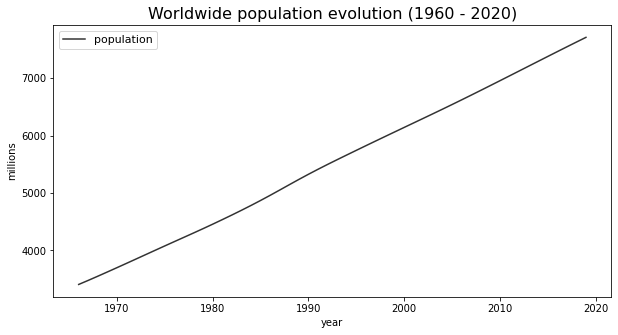

In [11]:
def plot_df_cols(df, cols_plot, colors_dict, title, size, ylabel):
    # plot multiple columns such as population and year from dataframe
    plt_show = df.plot(
        x="year", y=cols_plot,kind="line", figsize=size,
        title = title,
        color=[colors_dict.get(x, '#333333') for x in cols_plot])
    plt_show.legend(fontsize=11, loc="upper left")
    plt_show.set_ylabel(ylabel)
    plt_show.title.set_size(16)

data_population = data_world_cons.copy(deep=True)
data_population['population'] = data_population['population'] / 1000000
plot_df_cols(data_population, ['population'], {},
             'Worldwide population evolution (1960 - 2020)',
             (10, 5), 'millions')

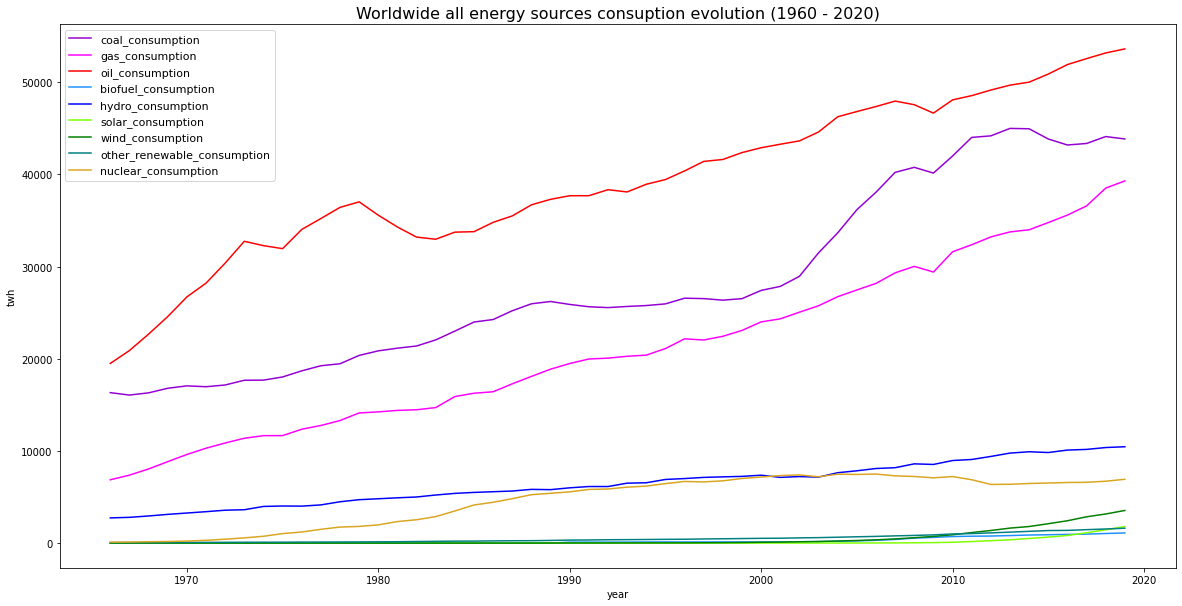

In [12]:
list_col_plot = fossil_sources_list + renewables_sources_list + ['nuclear_consumption']
    
color_fossil_list = ['red', 'magenta', 'darkviolet']
color_renewables_list = ['green', 'chartreuse', 'teal', 'blue','dodgerblue']
color_others_list = ['goldenrod', 'gold']
    
color_dict = {}
for col in list(data_world_cons):
    if col not in ['year', 'population', 'fossil_fuel_consumption', 'renewables_consumption', 'primary_energy_consumption']:
        if col in fossil_sources_list:
            color_dict[col] = color_fossil_list.pop()
        elif col in renewables_sources_list:
            color_dict[col] = color_renewables_list.pop()
        else:
            color_dict[col] = color_others_list.pop()

plot_df_cols(data_world_cons, list_col_plot, color_dict,
             'Worldwide all energy sources consuption evolution (1960 - 2020)',
             (20, 10), 'twh')

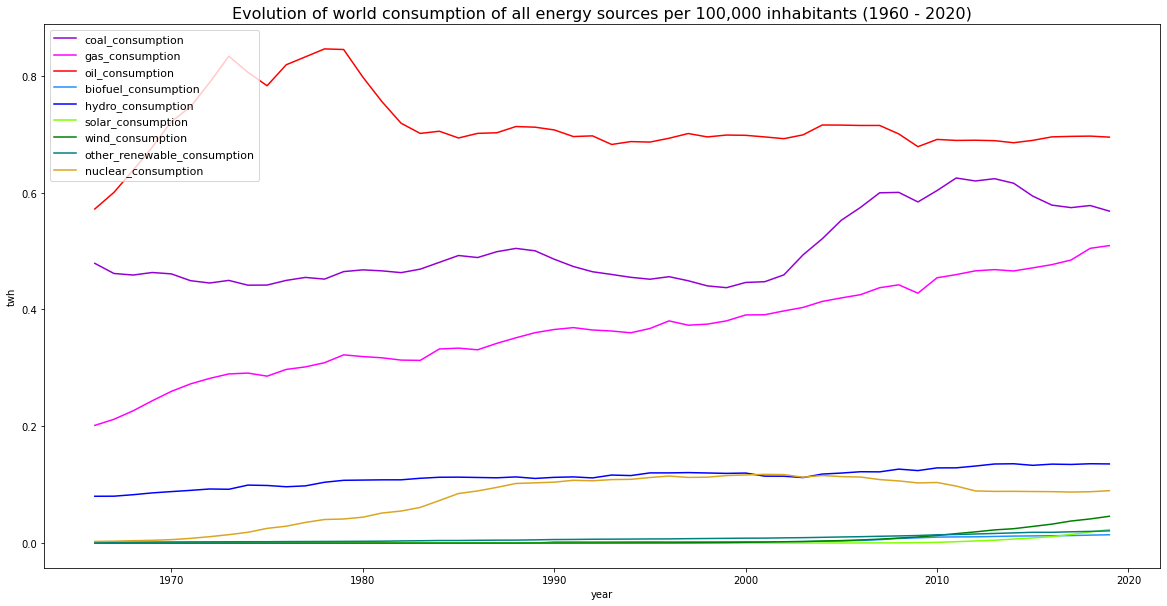

In [13]:
total_col_names = [
        'primary_energy_consumption',
        'fossil_fuel_consumption',
        'low_carbon_consumption'
]

data_world_cons_100k = divide_cols_by_one(
    data_world_cons, 'population', 100000, cols=list_col_plot + total_col_names
)

plot_df_cols(data_world_cons_100k, list_col_plot, color_dict,
             'Evolution of world consumption of all energy sources per 100,000 inhabitants (1960 - 2020)',
             (20, 10), 'twh')

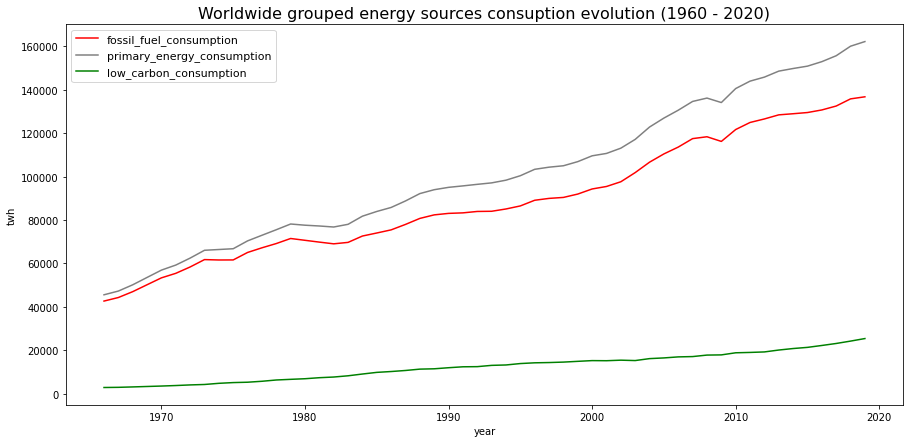

In [14]:
total_cols_list = ['fossil_fuel_consumption', 'primary_energy_consumption', 'low_carbon_consumption']
color_dict2 = {
    'fossil_fuel_consumption': 'red',
    'primary_energy_consumption': 'grey',
    'low_carbon_consumption': 'green',
}

plot_df_cols(data_world_cons, total_cols_list, color_dict2,
             'Worldwide grouped energy sources consuption evolution (1960 - 2020)',
             (15, 7), 'twh')

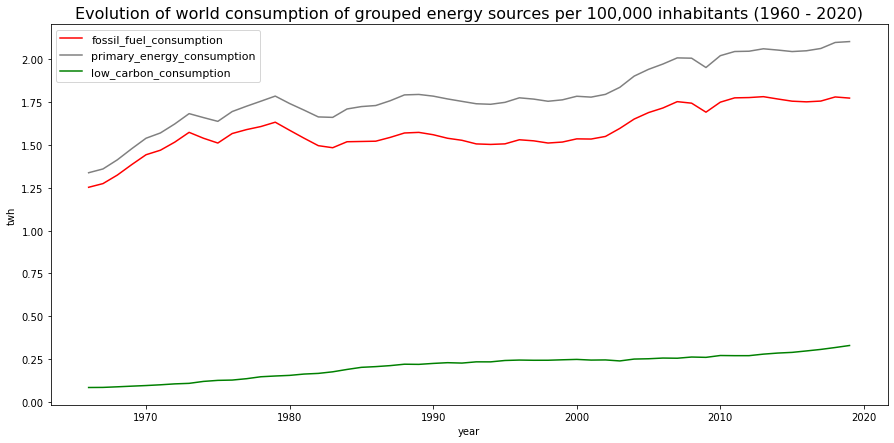

In [15]:
plot_df_cols(data_world_cons_100k, total_cols_list, color_dict2,
             'Evolution of world consumption of grouped energy sources per 100,000 inhabitants (1960 - 2020)',
             (15, 7), 'twh')

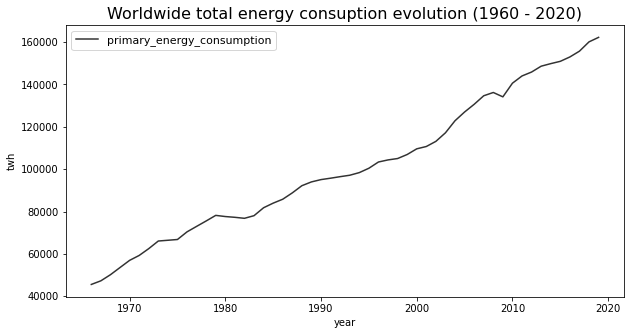

In [16]:
plot_df_cols(data_world_cons, ['primary_energy_consumption'], color_dict,
             'Worldwide total energy consuption evolution (1960 - 2020)',
             (10, 5), 'twh')

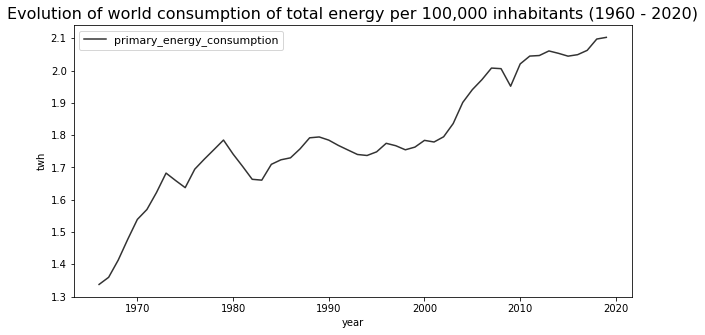

In [17]:
plot_df_cols(data_world_cons_100k, ['primary_energy_consumption'], color_dict,
             'Evolution of world consumption of total energy per 100,000 inhabitants (1960 - 2020)',
             (10, 5), 'twh')

In [18]:
print('Energy consumption per person and day in 2019: {} kwh'.format(
    round(((data_world_cons_100k[
        'primary_energy_consumption'].tolist()[-1] * 10**12 / 100000) / 365) / 1000, 2)
))

print('Energy consumption per person and day in 1965: {} kwh'.format(
    round(((data_world_cons_100k[
        'primary_energy_consumption'].tolist()[0] * 10**12 / 100000) / 365) / 1000, 2)
))

Energy consumption per person and day in 2019: 57.61 kwh
Energy consumption per person and day in 1965: 36.65 kwh


In [19]:
data_countries_save = divide_cols_by_one(
    data_countries, 'population', 100000, list_col_plot + total_col_names
)

def save_final_df(df, cols_save, new_index, name_file, year=2019):
    df2 = df.copy(deep=True)
    df2 = df2[df2['year'] == year].loc[:, cols_save].set_index(new_index)
    df2.to_csv(name_file)
    return df2

countries_primary = save_final_df(
    data_countries_save, ['iso_code', 'country', 'primary_energy_consumption'],
    'iso_code', 'countries_primary.csv'
)

countries_fossil = save_final_df(
    data_countries_save, ['iso_code', 'country', 'fossil_fuel_consumption'],
    'iso_code', 'countries_fossil.csv'
)

countries_renewable = save_final_df(
    data_countries_save, ['iso_code', 'country', 'renewables_consumption'],
    'iso_code', 'countries_renewable.csv'
)

countries_nuclear = save_final_df(
    data_countries_save, ['iso_code', 'country', 'nuclear_consumption'],
    'iso_code', 'countries_nuclear.csv'
)

countries_low_carbon = save_final_df(
    data_countries_save, ['iso_code', 'country', 'low_carbon_consumption'],
    'iso_code', 'countries_low_carbon.csv'
)

**Referències**
- https://www.delftstack.com/es/howto/python-pandas/how-to-replace-all-the-nan-values-with-zeros-in-a-column-of-a-pandas-dataframe/#m%25C3%25A9todo-df.fillna-para-reemplazar-todos-los-valores-de-nan-por-ceros
- https://www.statology.org/pandas-unique-values-in-column/
- https://www.analyticslane.com/2019/05/10/operaciones-de-filtrado-de-dataframe-con-pandas-en-base-a-los-valores-de-las-columnas/
- https://stackoverflow.com/questions/47104862/pandas-dataframe-plot-colors-by-column-name
- https://www.geeksforgeeks.org/filter-pandas-dataframe-with-multiple-conditions/
- https://i.stack.imgur.com/lFZum.png